# N-P-Z model

### NPZ (Nutrient-Phytoplankton-Zooplankton) model of Sarmiento and Gruber (2006)

    - dN/dt = -Vmax*N/(N+K)*P + mp*lp*P + mz*Z*((1-a)*g*P/Kp+lz) - c*(N-Nth)
    - dP/dt = Vmax*N/(N+K)*P -g*P*Z/Kp- lp*P
    - dZ/dt = a*g*P*Z/Kp - lz*Z

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [52]:
# coefficients
h = 1 # timestep size
t = np.arange(0,360,h) # time in day
N = np.size(t) # dimension of time step
nuto = .001 # initial condition for nutrient
phyo = .001 # initial condition for phyto
zooo = .001 # initial condition for zoo
# set parameters
Vmax = 1.4 # per day
K = 0.1 # mmol/m3
Kp= 2.8 # mmol/m3
mp = 0.7
mz = 0.7
a = 0.4
g = 1.4 # per day
lp = 0.05 # per day
lz = 0.12 # per day
c = 0.01 # per day
Nth = 30 # mmol/m3

In [53]:
def tendency(t,x,Vmax,K,Kp,mp,mz,a,g,lp,lz,c,Nth):
    nut=x[0]
    phy=x[1]
    zoo=x[2]
    dnutdt = -Vmax*nut/(nut+K)*phy + mp*lp*phy + mz*zoo*((1-a)*g*phy/Kp+lz) -c*(nut-Nth)
    dphydt = Vmax*nut/(nut+K)*phy - zoo*g*phy/Kp - lp*phy
    dzoodt = a*zoo*g*phy/Kp -lz*zoo
    out=np.array([dnutdt,dphydt,dzoodt])
    return out

In [54]:
# define model_run function
def model_run(trange,xinit,param,dt):
    # expand input
    Vmax = param[0]
    K = param[1]
    Kp= param[2]
    mp= param[3]
    mz= param[4]
    a = param[5]
    g = param[6]
    lp= param[7]
    lz= param[8]
    c = param[9]
    Nth = param[10]
    sol = solve_ivp(tendency,trange,xinit,args=(Vmax,K,Kp,mp,mz,a,g,lp,lz,c,Nth),method='RK45',max_step=dt)
    return sol

In [63]:
# set time range
trange = [0,50]
# set parameters
param=np.array([Vmax,K,Kp,mp,mz,a,g,lp,lz,c,Nth])
# set initial conditions
xinit = np.array([nuto,phyo,zooo])
# time step size
h = 1
out = model_run(trange,xinit,param,h)

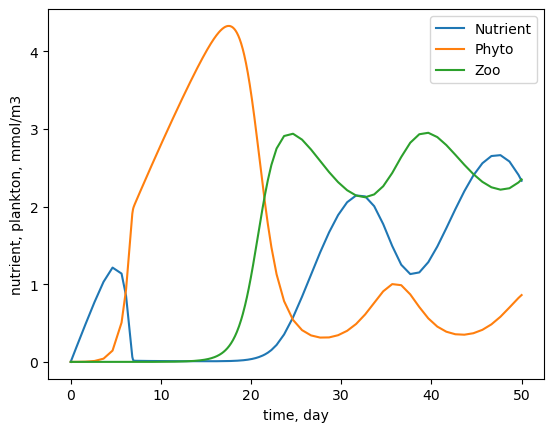

In [64]:
# plot the output
t_out = out.t
vec_out = out.y
x_out = vec_out[0,:]
y_out = vec_out[1,:]
z_out = vec_out[2,:]
#
plt.plot(t_out,x_out,label='Nutrient')
plt.plot(t_out,y_out,label='Phyto')
plt.plot(t_out,z_out,label='Zoo')
plt.legend()
plt.xlabel('time, day')
plt.ylabel('nutrient, plankton, mmol/m3')
plt.show()